In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
# Set the path to your dataset
path = r"C:\Users\Omkar\PROJECTS\recipe_decoder\dataset\Indian_Food_Images"
path

'C:\\Users\\Omkar\\PROJECTS\\recipe_decoder\\dataset\\Indian_Food_Images'

In [7]:
import os

path = r"C:\Users\Omkar\PROJECTS\recipe_decoder\dataset\Indian_Food_Images"
try:
    li = os.listdir(path)
    print(len(li))
    print(li)
except FileNotFoundError as e:
    print("File not found:", e)


206
['aam_panna', 'adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_pattice', 'aloo_shimla_mirch', 'aloo_tikki', 'aloo_vadi', 'anarsa', 'appe', 'ariselu', 'baingan_bharta', 'bandar_laddu', 'barfi', 'basundi', 'bebinca', 'beetroot_tikki', 'besan_ladoo', 'bhakarwadi', 'bhapa_doi', 'bhatura', 'bhel_puri', 'bhindi_masala', 'biryani', 'bisi_bele_bath', 'bombay_aloo', 'boondi', 'bread_pakora', 'butter_chicken', 'capsicum_curry', 'chaas', 'chai', 'chakli', 'chak_hao_kheer', 'cham_cham', 'chana_chaat', 'chana_masala', 'chapati', 'chawal', 'cheela', 'cheese_naan', 'chicken_65', 'chicken_chilli', 'chicken_korma', 'chicken_lolipop', 'chicken_razala', 'chicken_seekh_kebab', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'chilli_cheese_toastie', 'chole_bhature', 'chowmein', 'coconut_chutney', 'corn_cheese_balls', 'daal_bhaati_churma', 'daal_puri', 'dabeli', 'dahi_bhalla', 'dahi_chaat', 'dal_makhani', 'dal_rice', 'dal_tadka', 'dharwad_pedha', 'dhokla', 'doodhpak', 'double_ka_meetha', '

In [9]:
# Define data augmentation and preprocessing
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

preprocess_input = keras.applications.efficientnet.preprocess_input

In [11]:
# Create the dataset
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 10350 files belonging to 206 classes.
Using 8280 files for training.
Found 10350 files belonging to 206 classes.
Using 2070 files for validation.


In [13]:
# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

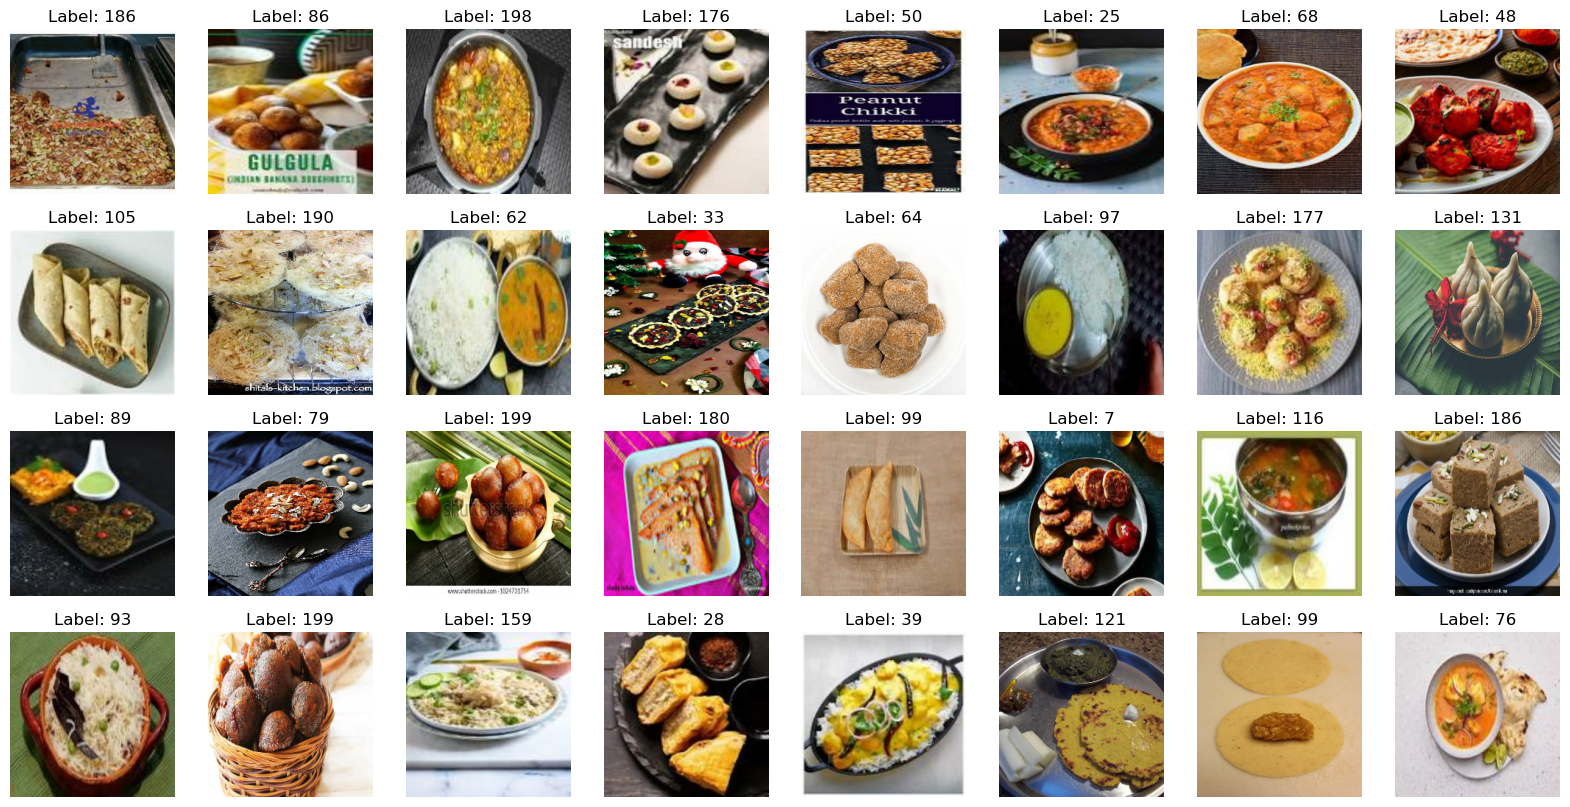

In [15]:
# Visualize some images
plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
    for i in range(32):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
plt.show()

In [17]:
# Create the model
def create_model(num_classes):
    base_model = keras.applications.EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(img_height, img_width, 3)
    )
    base_model.trainable = False

    inputs = keras.Input(shape=(img_height, img_width, 3))
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dropout(0.2)(x)
    outputs = keras.layers.Dense(num_classes)(x)
    return keras.Model(inputs, outputs)

model = create_model(num_classes=len(li))

In [19]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [21]:
# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.0813 - loss: 4.8562 - val_accuracy: 0.3386 - val_loss: 3.2501
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.3922 - loss: 2.9533 - val_accuracy: 0.3971 - val_loss: 2.6710
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 363s 1s/step - accuracy: 0.5155 - loss: 2.2588 - val_accuracy: 0.4290 - val_loss: 2.4173
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.5910 - loss: 1.8814 - val_accuracy: 0.4478 - val_loss: 2.2638
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.6497 - loss: 1.6079 - val_accuracy: 0.4662 - val_loss: 2.1779
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.6663 - loss: 1.4787 - val_accuracy: 0.4802 - val_loss: 2.1073
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step - accuracy: 0.7147 - loss: 1.3129 - val_accuracy: 0.4807 - val_loss: 2.0643
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.7352 - loss: 1.2029 - val_accu

In [25]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [27]:
# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.7750 - loss: 0.9972 - val_accuracy: 0.5014 - val_loss: 1.9771
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.8009 - loss: 0.9068 - val_accuracy: 0.5111 - val_loss: 1.9704
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 359s 1s/step - accuracy: 0.8238 - loss: 0.8036 - val_accuracy: 0.5014 - val_loss: 1.9636
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.8284 - loss: 0.7799 - val_accuracy: 0.5077 - val_loss: 1.9679
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.8375 - loss: 0.7332 - val_accuracy: 0.5135 - val_loss: 1.9370
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.8501 - loss: 0.6896 - val_accuracy: 0.5159 - val_loss: 1.9467
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.8522 - loss: 0.6609 - val_accuracy: 0.5203 - val_loss: 1.9320
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - accuracy: 0.8656 - loss: 0.6248 - val_accu

In [28]:
# Function to preprocess a single image
def preprocess_image(image_path):
    img = keras.utils.load_img(image_path, target_size=(img_height, img_width))
    img_array = keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    return preprocess_input(img_array)

In [31]:
# Function to predict
def predict(model, image_path):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    predicted_class = li[np.argmax(score)]
    predicted_probability = np.max(score)
    return predicted_class, predicted_probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


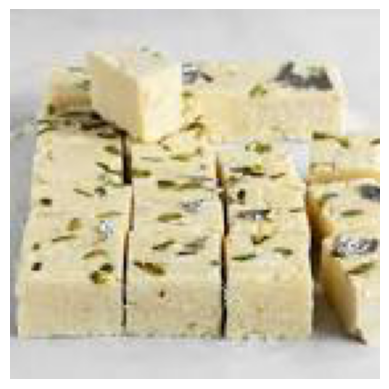

Predicted class: barfi, Probability: 0.7044


In [33]:
# Test the model
test_path = r"C:\Users\Omkar\PROJECTS\recipe_decoder\dataset\Indian_Food_Images\barfi\barfi_6.jpg"
predicted_class, predicted_probability = predict(model, test_path)

img = Image.open(test_path)
plt.imshow(img)
plt.axis("off")
plt.show()
print(f"Predicted class: {predicted_class}, Probability: {predicted_probability:.4f}")

In [39]:
# Save the model
model.save('tf_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


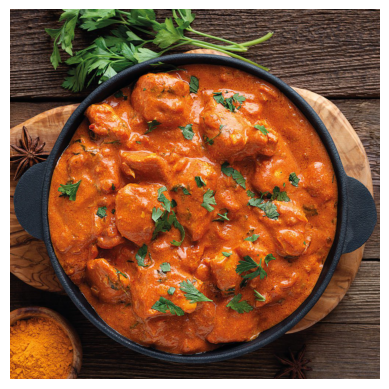

Predicted class: butter_chicken, Probability: 0.6533


In [47]:
# Test with another image
test_path2 = r"C:\Users\Omkar\PROJECTS\recipe_decoder\dataset\Indian_Food_Images\butter_chicken\1c212d65d9.jpg"
predicted_class, predicted_probability = predict(model, test_path2)

img = Image.open(test_path2)
plt.imshow(img)
plt.axis("off")
plt.show()
print(f"Predicted class: {predicted_class}, Probability: {predicted_probability:.4f}")

In [49]:
# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 206)                 │         263,886 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,841,231 (18.47 MB)

 Trainable params: 263,886 (1.01 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 527,774 (2.01 MB)